#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import helper

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

In [80]:
data,X,y = helper.get_data_normalized()
X_train, X_test, y_train, y_test = helper.split_data(X,y,0.25)

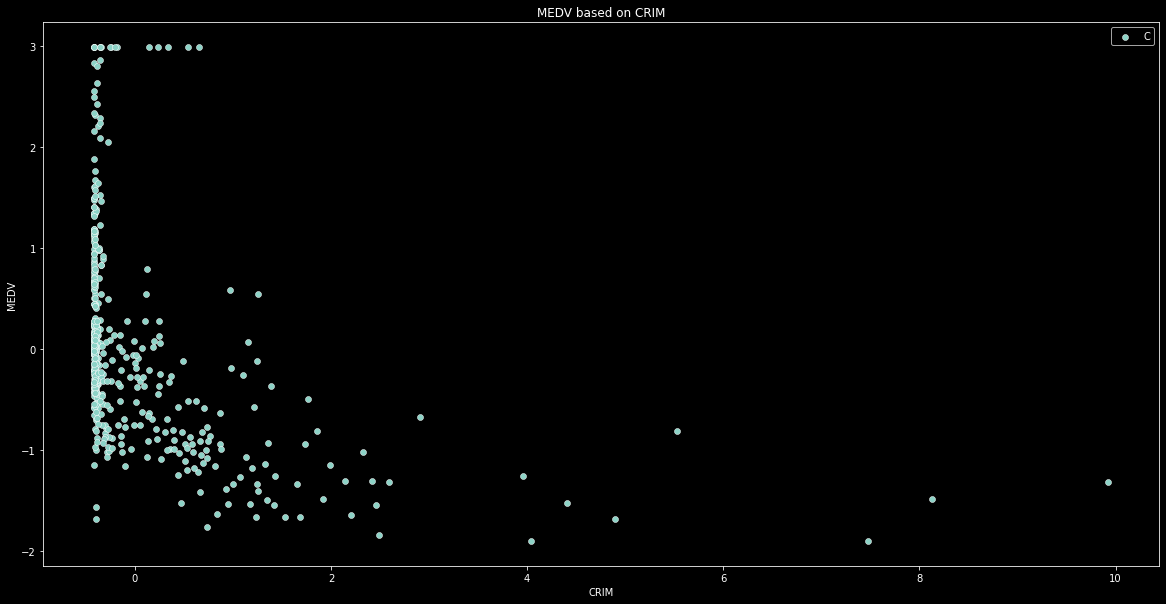

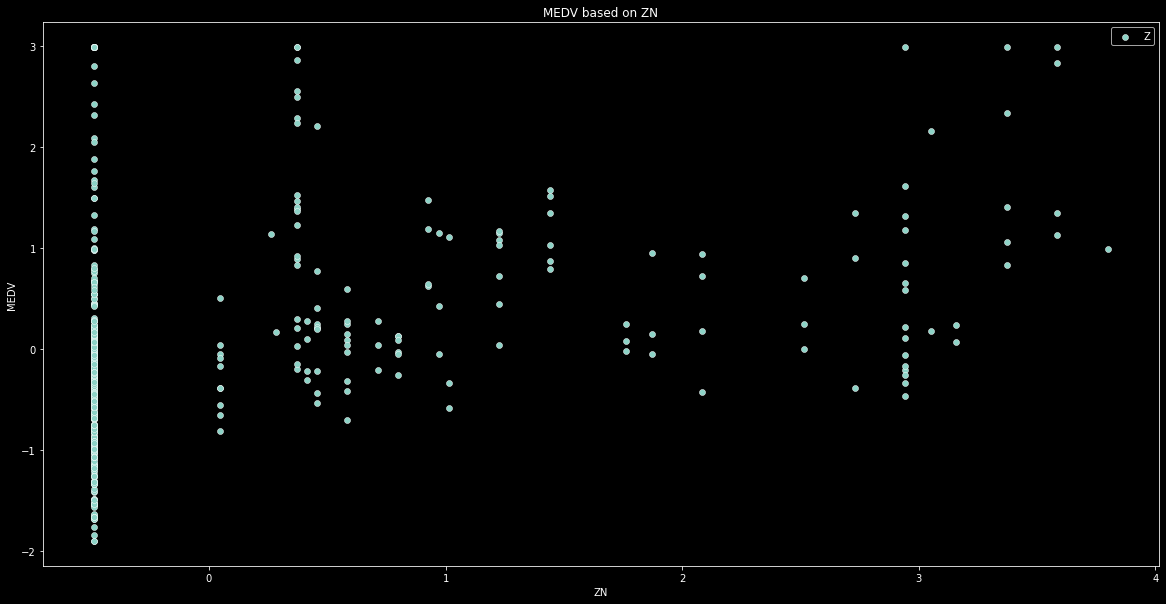

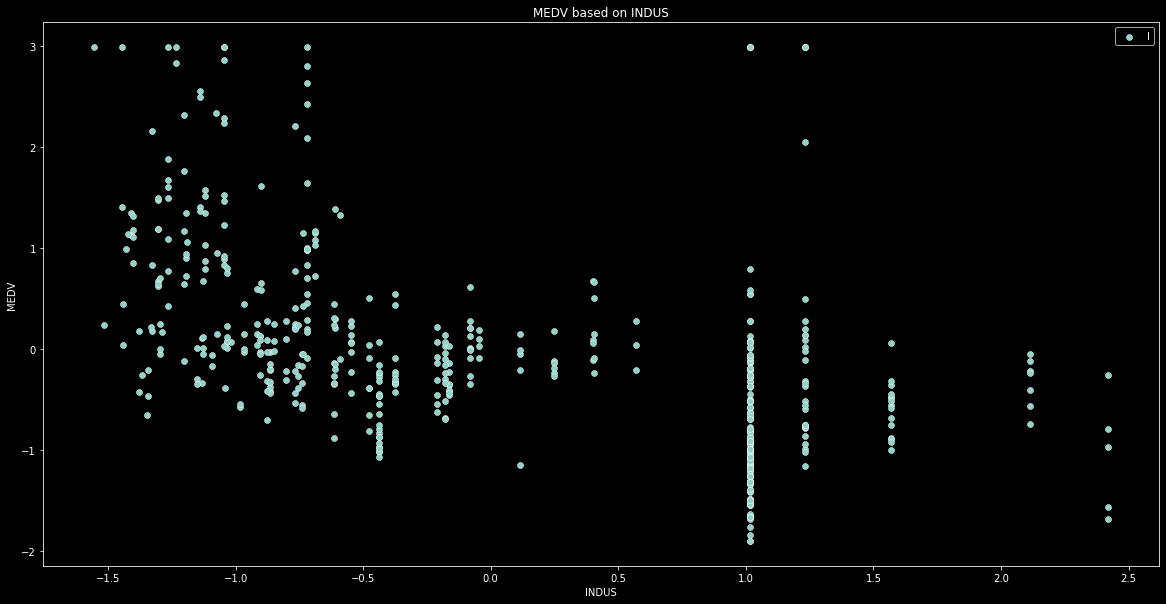

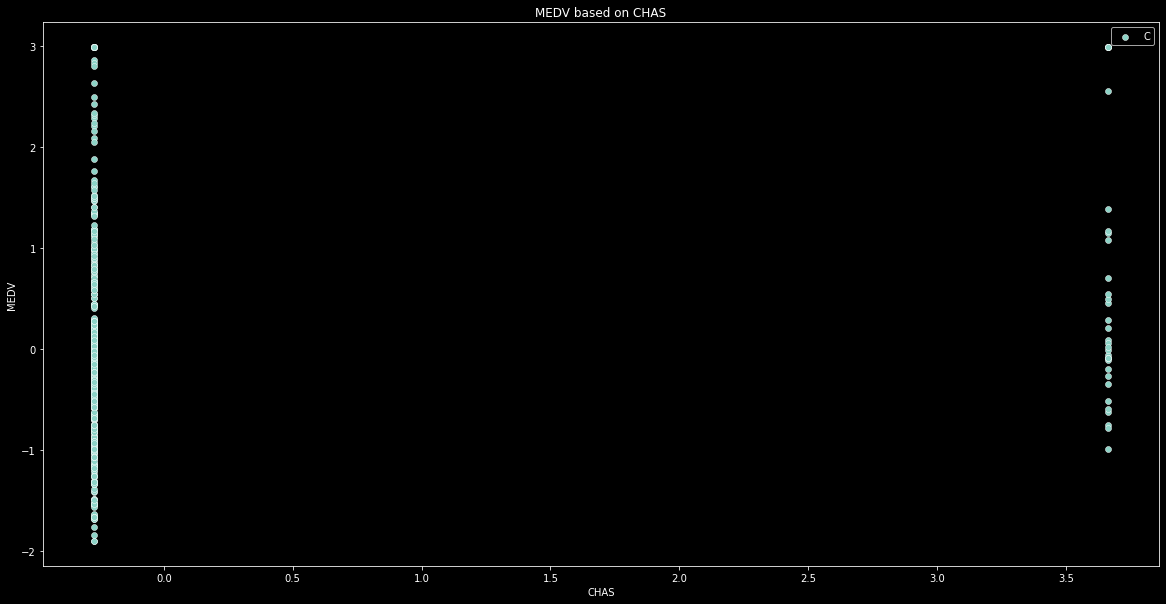

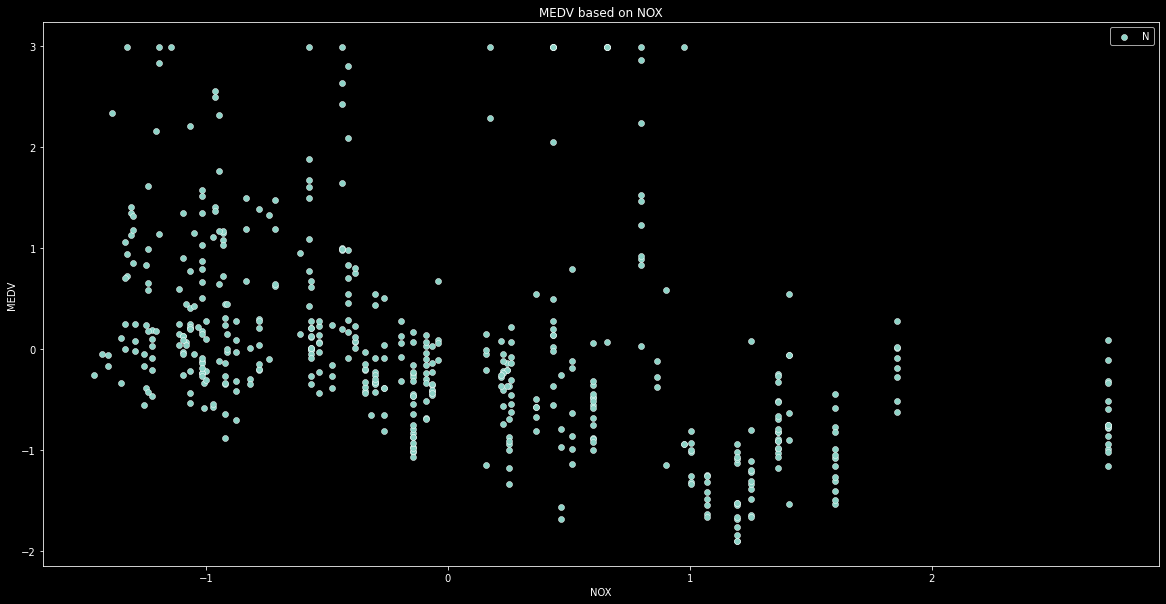

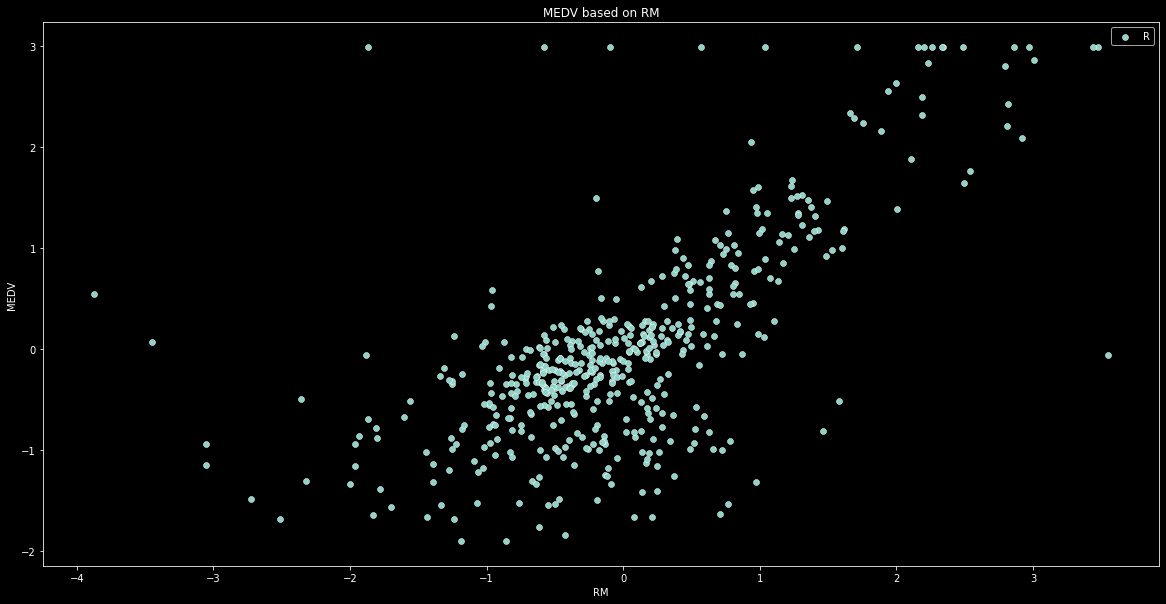

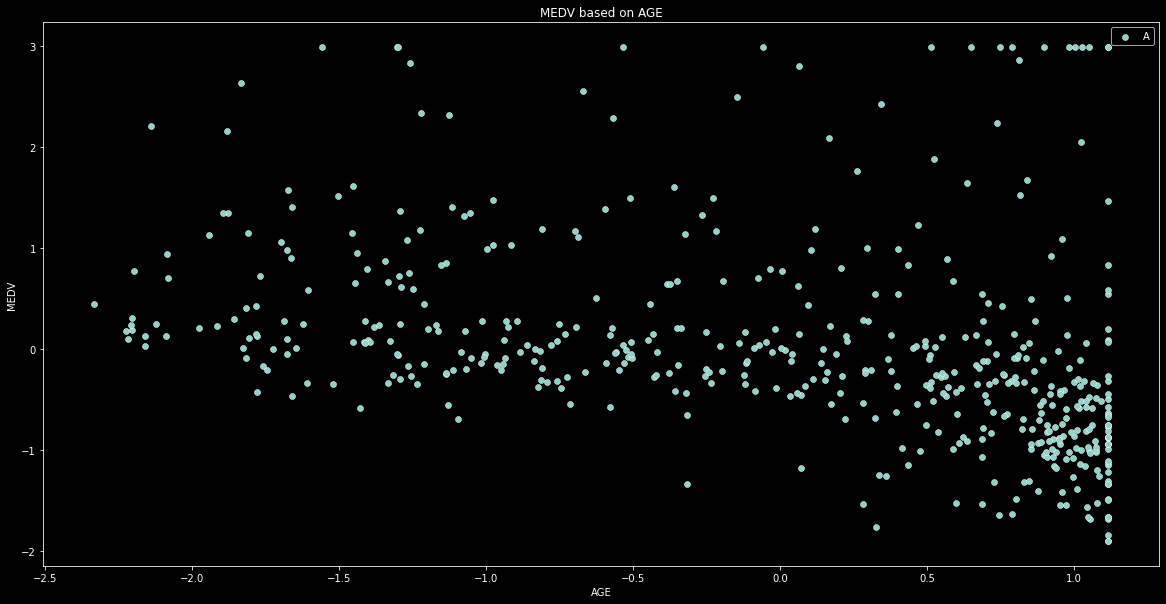

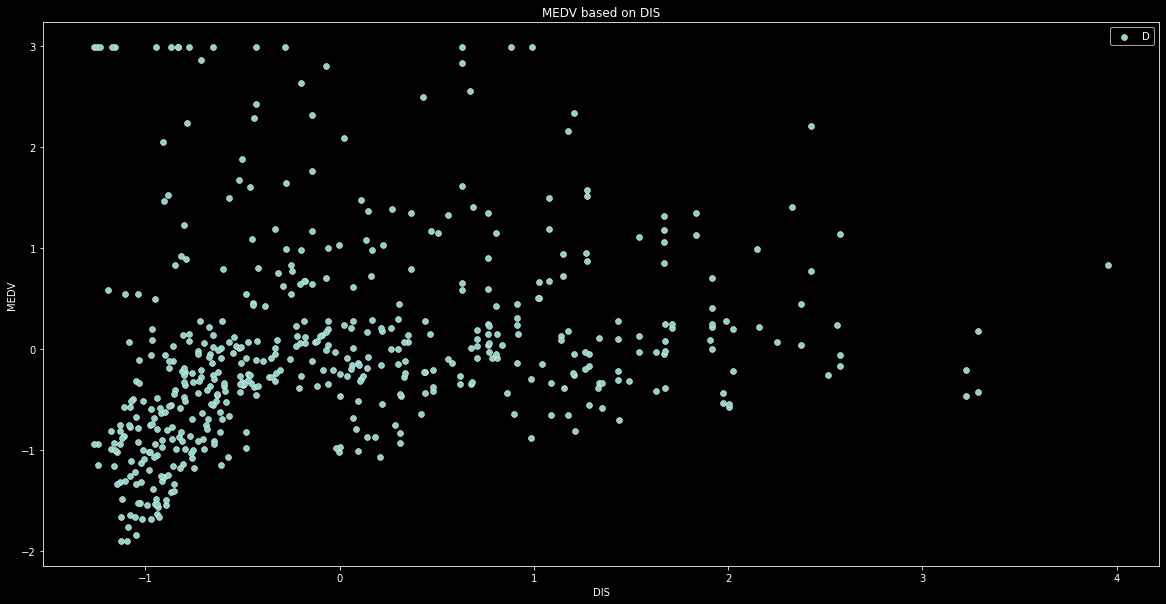

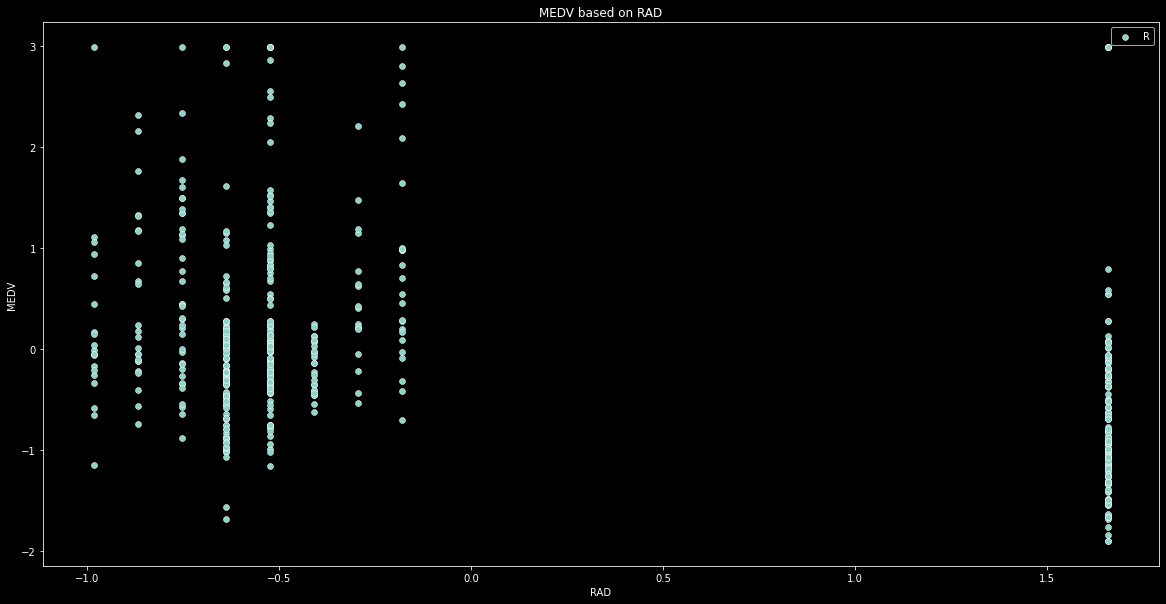

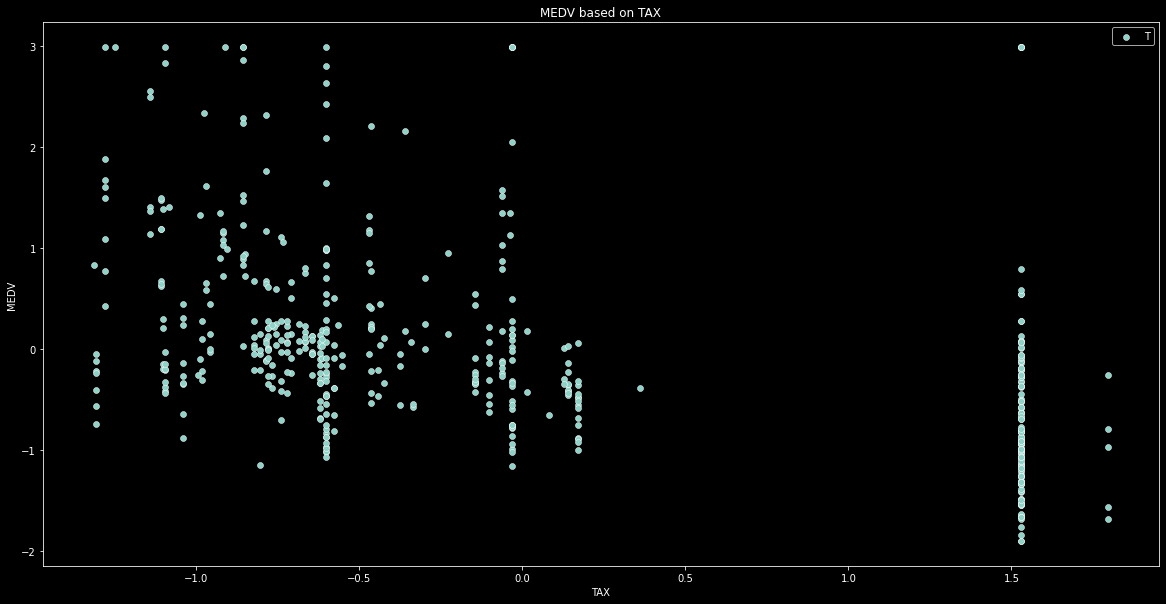

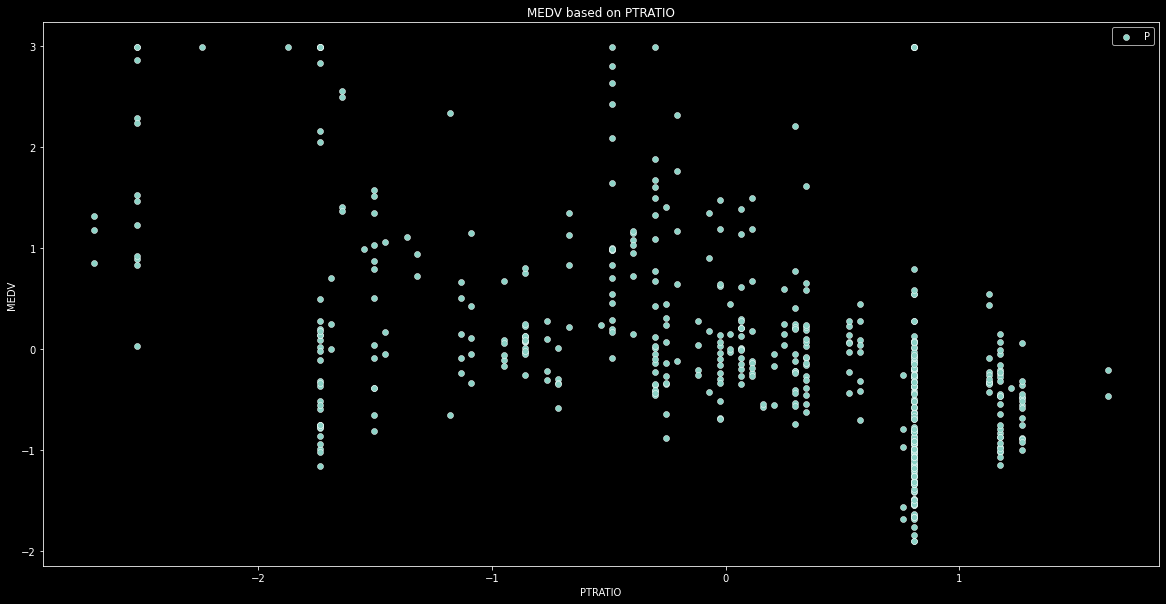

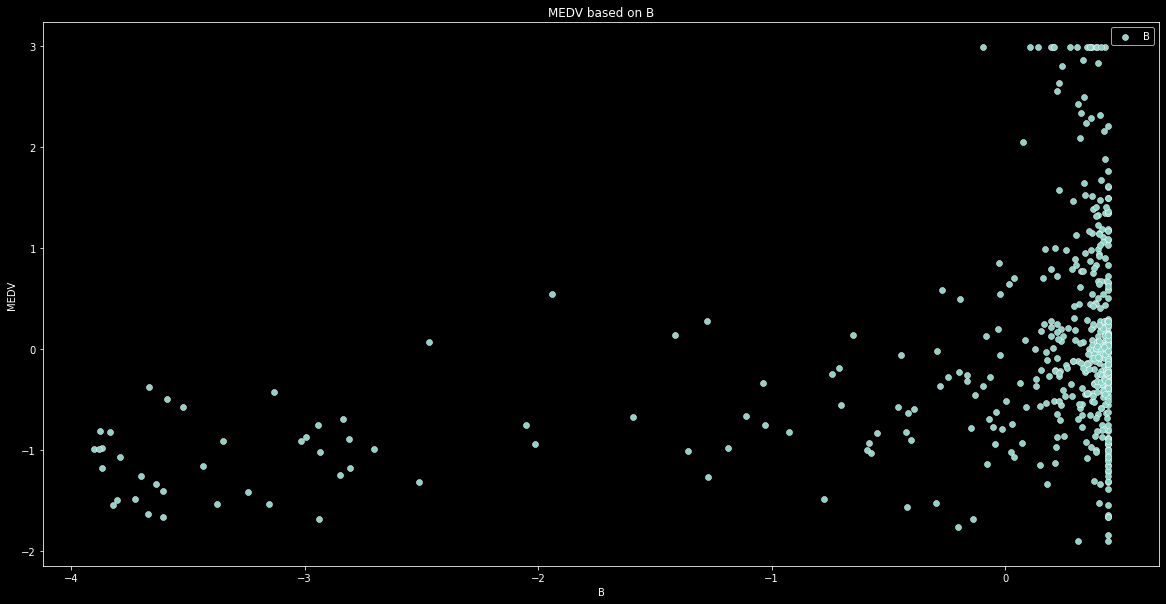

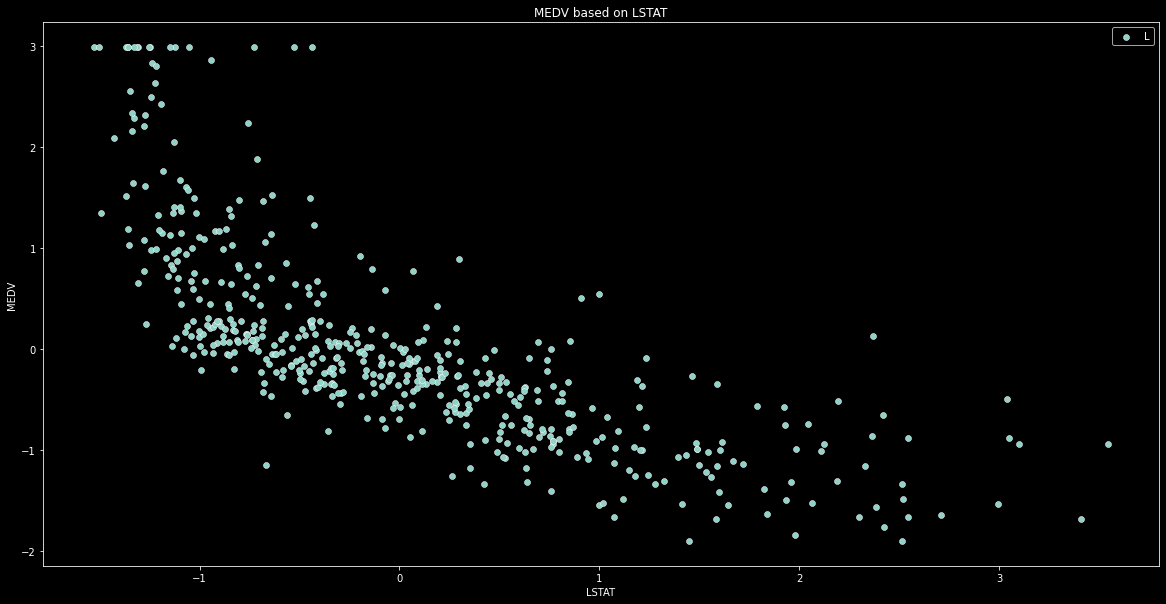

In [82]:
for feature in X.columns:
  helper.show_data(df=data, x=feature, title='MEDV based on ' + str(feature))

<font color=#48f50d>
According to the plots, some features have a big correlation with target (MEDV) such as LSTAT, DIS and RM.
On the other hand some features have a small correlation with target (MEDV) and can be cast out as almost independent features to reduce our calculation time such as PTRATIO.
</font>

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


<font color=#48f50d>
1- Close form of linear regression:
$$
w=(X^TX+\lambda I)^{-1} X^Ty
$$
</font>

In [122]:
#2
#this is just template you are free to implement is however you want. add many cell as you wish
class LinearRegressionModel: #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,phi):
        self.phi = phi
        self.w = None
    

    def fit(self,X,y,regularization):
        """
        get X and y train and learn the parameter by the equation.
    
        """
        X = self.phi(X)
        first_param = np.add(np.dot(X.T, X), regularization * np.identity(X.shape[1]))
        self.w = np.dot(np.linalg.inv(first_param), np.dot(X.T, y))
        
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        error_vec = y - self.transform(X)
        return (np.linalg.norm(error_vec)**2)/len(y), np.linalg.norm(self.w)
        
    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        return np.dot(self.phi(X), self.w)
    
    def get_param(self):
        "return w "
        return self.w

In [123]:
#3
linear_regression = LinearRegressionModel(lambda X : np.c_[np.ones(X.shape[0]),X])
linear_regression.fit(X_train, y_train, 0)
predict = linear_regression.transform(X_test)

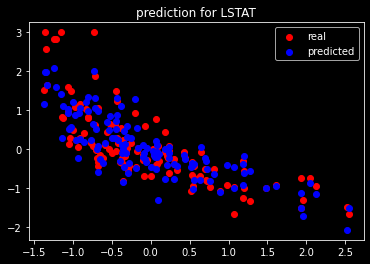

In [124]:
#3
plt.scatter(X_test['LSTAT'], y_test, c='red')
plt.scatter(X_test['LSTAT'], predict, c='blue')
plt.legend(labels=['real', 'predicted'])
plt.title('prediction for LSTAT')
plt.show()

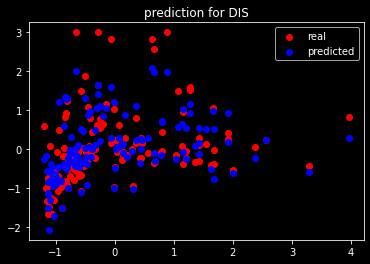

In [125]:
#3
plt.scatter(X_test['DIS'], y_test, c='red')
plt.scatter(X_test['DIS'], predict, c='blue')
plt.legend(labels=['real', 'predicted'])
plt.title('prediction for DIS')
plt.show()

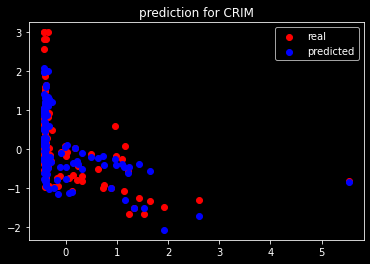

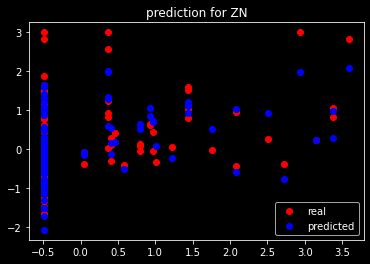

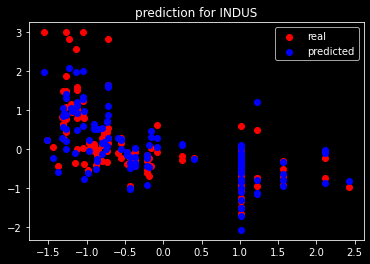

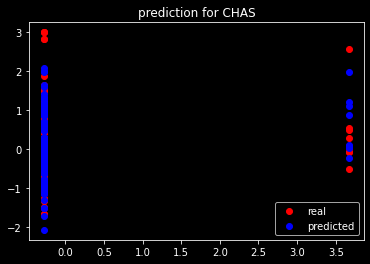

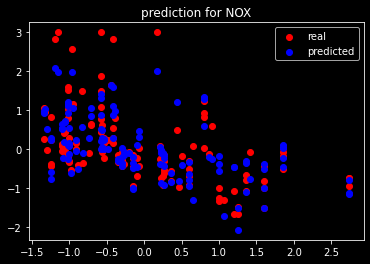

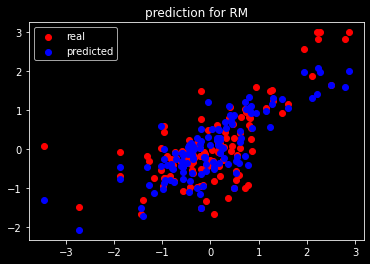

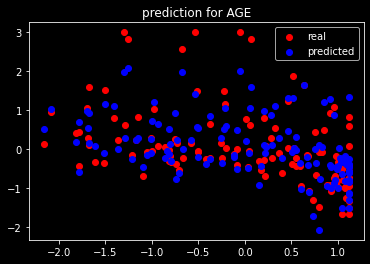

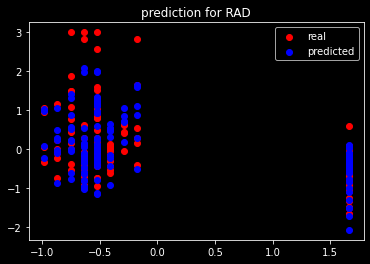

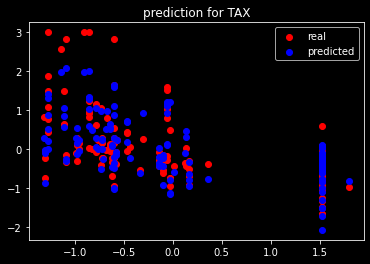

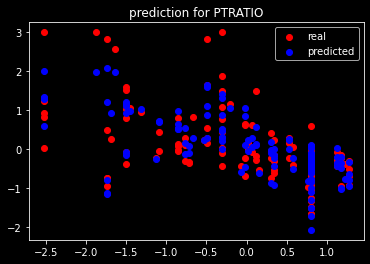

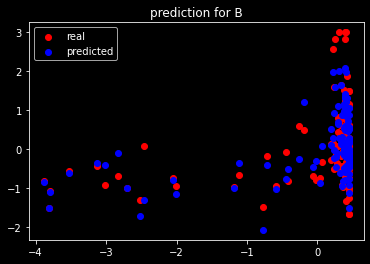

In [126]:
#3
for feature in X.columns.drop('LSTAT').drop('DIS'):
  plt.scatter(X_test[feature], y_test, c='red')
  plt.scatter(X_test[feature], predict, c='blue')
  plt.legend(labels=['real', 'predicted'])
  plt.title('prediction for ' + feature)
  plt.show()

In [127]:
#4
def plot_weight_lambda(X_train, y_train, X_test, y_test):
  weights = []
  lambdas = np.arange(0, 0.1, 0.005)
  for la in lambdas:
    linear_regression.fit(X_train, y_train, la)
    result = linear_regression.evaluate(X_test, y_test)
    weights.append(result[1])

  plt.plot(lambdas, weights)
  plt.xlabel('lambda')
  plt.ylabel('weights_norm')
  plt.title('plot regularization (weights_norm vs lambda)')
  plt.show()

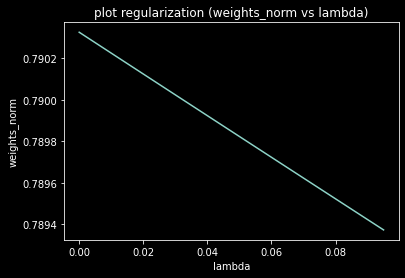

In [128]:
#4
plot_weight_lambda(X_train, y_train, X_test, y_test)

In [129]:
#5
def plot_error_lambda(X_train, y_train, X_test, y_test):
  errors = []
  lambdas = np.arange(0, 0.1, 0.005)
  for la in lambdas:
    linear_regression.fit(X_train, y_train, la)
    result = linear_regression.evaluate(X_test, y_test)
    errors.append(result[0])

  plt.plot(lambdas, errors)
  plt.xlabel('lambda')
  plt.ylabel('test_error')
  plt.title('plot regularization (test_error vs lambdas)')
  plt.show()

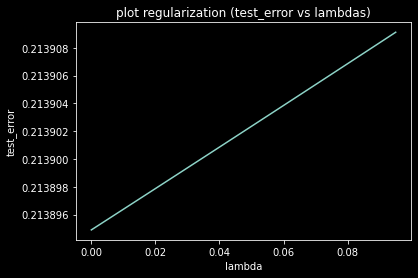

In [130]:
#5
plot_error_lambda(X_train, y_train, X_test, y_test)

<font color=48f50d>
6- according to the formula shown in the question, as we increase regularization parameter, the minimization focuses more on minimizing the norm of w which will result in its reduction. it also pays less attention to minimizing the train error which will lead us to more bias and will prevent overfitting. In this case because of our simple model, the error increased.
</font>

In [131]:
#7
X_train_squared = pd.concat([X_train, X_train ** 2], axis=1)
X_test_squared = pd.concat([X_test, X_test ** 2], axis=1)

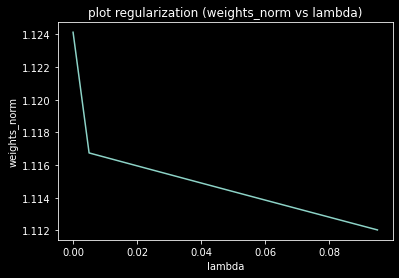

In [132]:
#7_4
plot_weight_lambda(X_train_squared, y_train, X_test_squared, y_test)

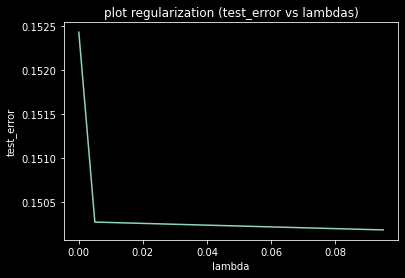

In [133]:
#7-5
plot_error_lambda(X_train_squared, y_train, X_test_squared, y_test)

<font color=48f50d>
7_6: In this part we made our model more complex by adding  X_squared. we should consider that more complex models aren't always better and we shoulf find the optimum amount of complexity. but in this case it caused less error and by increasing reguralization we were able to prevent overfitting and decreasing weights norm as it was explained in the previous part. And because our model was more complex and tend to overfit, increasing regularization parameter caused error decreasing.
</font>

In [134]:
#8
X_train_powered = pd.concat([X_train_squared, X_train ** 3], axis=1)
X_test_powered = pd.concat([X_test_squared, X_test ** 3], axis=1)

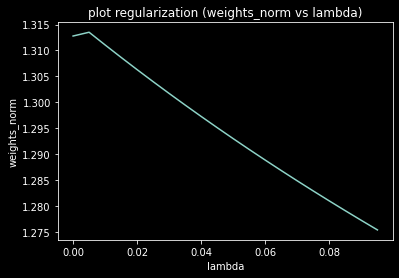

In [135]:
#8_4
plot_weight_lambda(X_train_powered, y_train, X_test_powered, y_test)

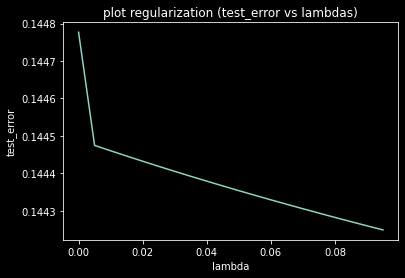

In [136]:
#8_5
plot_error_lambda(X_train_powered, y_train, X_test_powered, y_test)

<font color=48f50d>
8_6: In this part we made our model even more complex with adding X_powred_3 that resulted in less error and we were able to decrease the error and weights norm even more by increasing regularization parameter as was explained in the previous part.
</font>

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

<font color=#48f50d>
1- Gradient descent update formula:
$$
w^{t + 1} = w^t - \alpha \nabla_w \mathcal{L}
$$
where
$$
\mathcal{L} = \frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
</font>

In [137]:
data,X,y = helper.get_data_normalized()
X_train, X_test, y_train, y_test = helper.split_data(X,y,0.25)

In [138]:
#2
#this is just template you are free to implement is however you want.
class LinearRegressionModel2:#phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,phi):
        self.phi = phi
        self.w = None
    
    def fit(self,X,y,regularization,steps=100):
        X = self.phi(X)
        self.w = np.random.rand(X.shape[1]) * 10 - 5 * np.ones((X.shape[1]))
        param2 = regularization * np.identity(X.shape[1])
        hessian = np.linalg.inv(np.add(np.dot(X.T, X), param2))
        for _ in range(steps):
          param1 = regularization * self.w
          grad = np.subtract(param1, np.dot(X.T, np.subtract(y, np.dot(X, self.w))))
          self.w -= np.dot(hessian, grad)


    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        error_vec = y - self.transform(X)
        return (np.linalg.norm(error_vec)**2)/len(y), np.linalg.norm(self.w)

    def transform(self,X):
        """
        get X and calculate Phi(X)W as predicted values.
    
        """
        return np.dot(self.phi(X), self.w)
    
    def get_param(self):
        "return w "
        return self.w

In [139]:
#3
linear_regression2 = LinearRegressionModel2(lambda X: np.c_[np.ones(X.shape[0]), X])
linear_regression2.fit(X_train, y_train, 0)
predict = linear_regression2.transform(X_test)

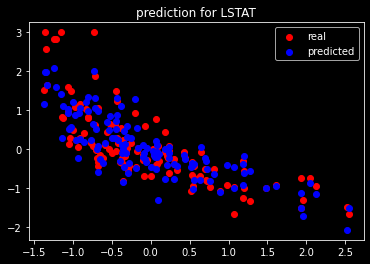

In [140]:
#3
plt.scatter(X_test['LSTAT'], y_test, c='red')
plt.scatter(X_test['LSTAT'], predict, c='blue')
plt.legend(labels=['real', 'predicted'])
plt.title('prediction for LSTAT')
plt.show()

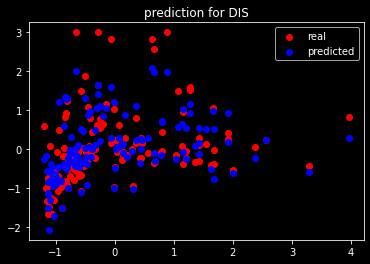

In [141]:
#3
plt.scatter(X_test['DIS'], y_test, c='red')
plt.scatter(X_test['DIS'], predict, c='blue')
plt.legend(labels=['real', 'predicted'])
plt.title('prediction for DIS')
plt.show()

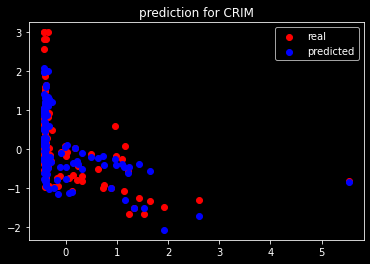

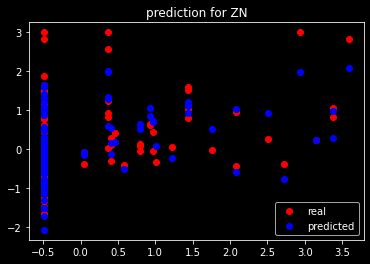

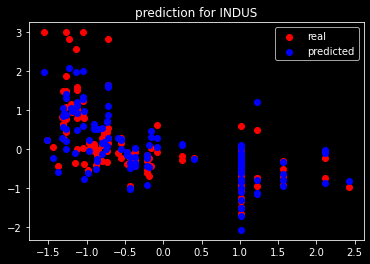

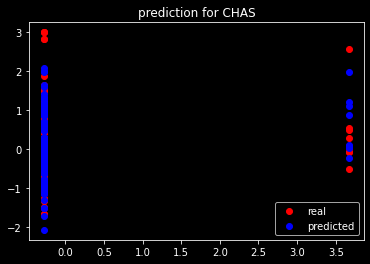

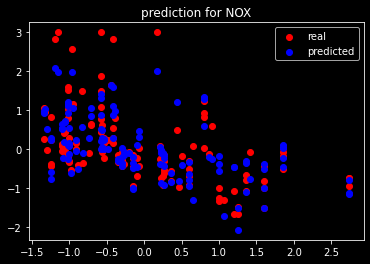

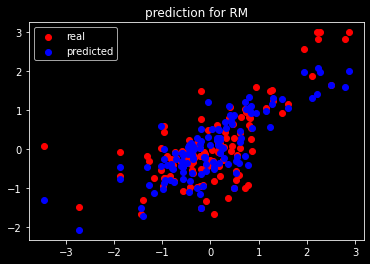

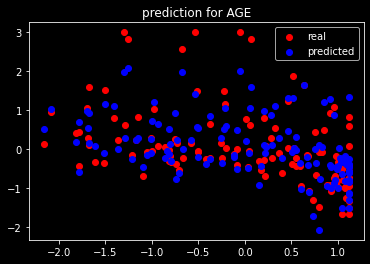

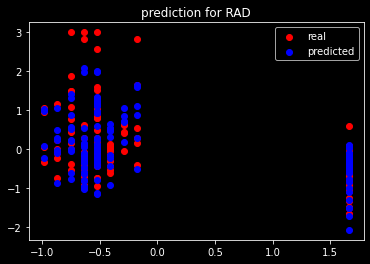

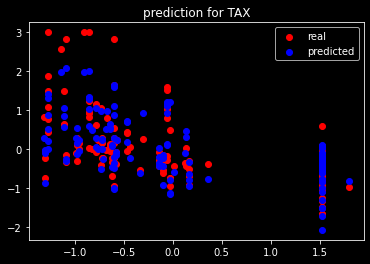

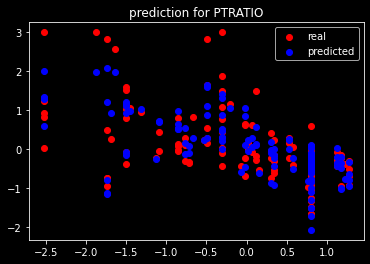

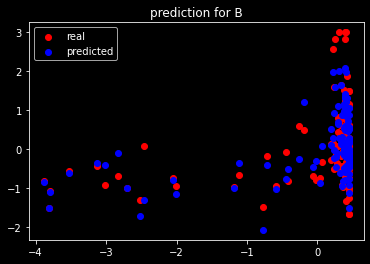

In [142]:
#3
for feature in X.columns.drop('LSTAT').drop('DIS'):
  plt.scatter(X_test[feature], y_test, c='red')
  plt.scatter(X_test[feature], predict, c='blue')
  plt.legend(labels=['real', 'predicted'])
  plt.title('prediction for ' + feature)
  plt.show()

In [143]:
#4
def plot_weight_lambda2(X_train, y_train, X_test, y_test):
  weights = []
  lambdas = np.arange(0, 10, 0.1)
  for la in lambdas:
    linear_regression2.fit(X_train, y_train, la)
    result = linear_regression2.evaluate(X_test, y_test)
    weights.append(result[1])

  plt.plot(lambdas, weights)
  plt.xlabel('lambda')
  plt.ylabel('weights_norm')
  plt.title('plot regularization (weights_norm vs lambda)')
  plt.show()

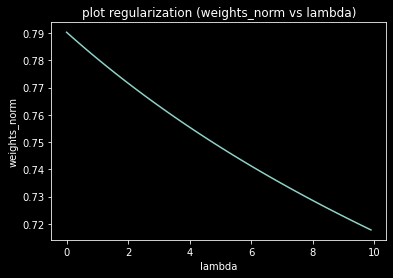

In [144]:
#4
plot_weight_lambda2(X_train, y_train, X_test, y_test)

In [145]:
#5
def plot_error_lambda2(X_train, y_train, X_test, y_test):
  errors = []
  lambdas = np.arange(0, 10, 0.1)
  for la in lambdas:
    linear_regression2.fit(X_train, y_train, la)
    result = linear_regression2.evaluate(X_test, y_test)
    errors.append(result[0])

  plt.plot(lambdas, errors)
  plt.xlabel('lambda')
  plt.ylabel('test_error')
  plt.title('plot regularization (test_error vs lambdas)')
  plt.show()

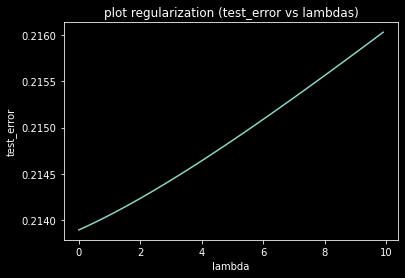

In [146]:
#5
plot_error_lambda2(X_train, y_train, X_test, y_test)

<font color=48f50d>
6- As we explained in the close form part:  

according to the formula shown in the question, as we increase regularization parameter, the minimization focuses more on minimizing the norm of w which will result in its reduction. it also pays less attention to minimizing the train error which will lead us to more bias and will prevent overfitting. In this case because of our simple model, the error increased.
</font>

In [147]:
#7
X_train_squared = pd.concat([X_train, X_train ** 2], axis=1)
X_test_squared = pd.concat([X_test, X_test ** 2], axis=1)

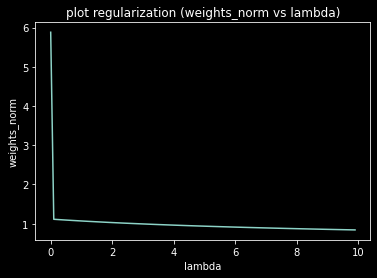

In [148]:
#7_4
plot_weight_lambda2(X_train_squared, y_train, X_test_squared, y_test)

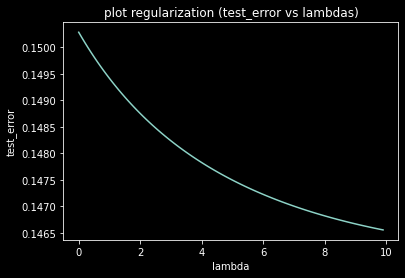

In [149]:
#7_5
plot_error_lambda2(X_train_squared, y_train, X_test_squared, y_test)

<font color=48f50d>
7_6: As we explained in the close form part:

In this part we made our model more complex by adding  X_squared. we should consider that more complex models aren't always better and we shoulf find the optimum amount of complexity. but in this case it caused less error and by increasing reguralization we were able to prevent overfitting and decreasing weights norm as it was explained in the previous part. And because our model was more complex and tend to overfit, increasing regularization parameter caused error decreasing.
</font>

In [150]:
#8
X_train_powered = pd.concat([X_train_squared, X_train ** 3], axis=1)
X_test_powered = pd.concat([X_test_squared, X_test ** 3], axis=1)

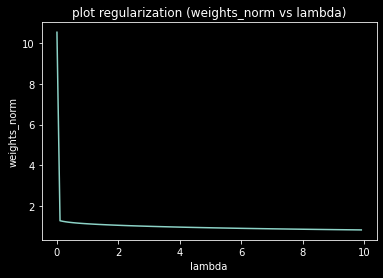

In [151]:
#8_4
plot_weight_lambda2(X_train_powered, y_train, X_test_powered, y_test)

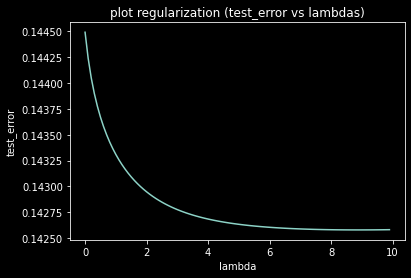

In [121]:
#8_5
plot_error_lambda2(X_train_powered, y_train, X_test_powered, y_test)

<font color=48f50d>
8_6: As we explained in the close form part: 

In this part we made our model even more complex with adding X_powred_3 that resulted in less error and we were able to decrease the error and weights norm even more by increasing regularization parameter as was explained in the previous part.
</font>

<font color=48f50d>
At last we previously explained that making the model more complex will always reduce bias and error in training data (the model can fit more accuratly on the traing data). but it will also increase overfitting chance so we should pay attention to bias-varrince tradeoff and choose the best model. in this case adding complexity to the model resulted in less test error so it can be considered as a good choice.
</font>